# **Predicción del comportamiento de la acción de Coca Cola**

* Debes proponer una herramienta de predicción para el comportamiento de la acción de Coca Cola siguiendo el ciclo CRISP-DM.  Para desarrollar el modelo, tienes la responsabilidad de buscar y descargar los datos de la acción desde el primero de enero de 2020 hasta el día de ayer; para esto, si así lo deseas, puedes utilizar la ayuda de ChatGPT.

* El entregable de esta parte del parcial es un jupyter notebook en la plataforma colab de google de acuerdo con los siguientes lineamientos:
  * La construcción de tu aplicación es individual, debe ser un resultado de tu trabajo único, personal y original.

  * La solución que propongas debe además reflejar la aplicación de todos los temas discutidos en las clases.

  * La elección que hagas de las características explicativas y la(s) variable(s) a predecir debe cumplir con la condición apriori/aposteriori que deben tener las variables independientes/dependiente.
  
  * Debes utilizar la librería Scikit-learn para la construcción de la aplicación de predicción utilizando regresión lineal múltiple.


* En tu colab debes elaborar las siguientes secciones:
  * Una discusión acerca de cada etapa del ciclo CRISP-DM correspondiente a esta aplicación.  En los casos que aplique, el código que corresponde a cada etapa debe seguir la explicación de dicha etapa.
  * Debes presentar un análisis de la naturaleza del ajuste del modelo y recomendar el curso de acción de acuerdo con los resultados que obtengas
  * Debes interpretar cada uno de los resultados obtenidos en el contexto definido por ti en el paso correspondiente en el ciclo CRISP-DM
  * Debes identificar las características que no contribuyen a la predicción del comportamiento de la variable dependiente que elijas
  * Debes presentar los resultados de la evaluación del desempeño de tu modelo.

# ***CRISP-DM CYCLE "Cross-Industry Standard Process for Data Mining"***

## **1. Comprensión del negocio:**

**Definición del problema:**

El objetivo principal de este proyecto es desarrollar una herramienta de predicción que permita anticipar el comportamiento de la acción de Coca Cola (KO). Este modelo de predicción busca apoyar decisiones de inversión, proporcionando insights basados en datos históricos del precio de las acciones. Desde el 1 de enero de 2020 hasta la fecha más reciente, se analizarán los patrones en el comportamiento de la acción para prever su rendimiento futuro.

**Objetivos del negocio:**

1. **Desarrollo de una herramienta predictiva:** Crear un modelo que pueda prever con precisión el precio de cierre de la acción de Coca Cola en un período futuro determinado.
2. **Apoyo a decisiones de inversión:** Proveer una herramienta que ayude a los inversores a tomar decisiones más informadas basadas en las predicciones del modelo.
3. **Identificación de factores clave:** Determinar qué variables tienen mayor impacto en el precio de las acciones de Coca Cola, ayudando a entender mejor los factores que afectan su comportamiento en el mercado.

**Criterios de éxito del proyecto:**

1. El modelo debe alcanzar un nivel aceptable de precisión y robustez, con métricas específicas de rendimiento (como RMSE, MAE) que se definirán en la fase de evaluación.
2. Capacidad para actualizar y reentrenar el modelo con nuevos datos para mantener su precisión a lo largo del tiempo.
3. Interpretación clara de cómo los factores externos e internos influyen en los precios de las acciones de Coca Cola.

**Riesgos y suposiciones:**

- **Riesgos:** Cambios imprevistos en el mercado debido a factores macroeconómicos, políticos o desastres naturales que podrían afectar la precisión del modelo.
- **Suposiciones:** Se asume que los patrones históricos de precios son indicativos de comportamientos futuros, y que los datos históricos están completos y son precisos.

**Plan de proyecto:**

1. **Comprensión de los Datos:** Adquisición y exploración de los datos de las acciones de Coca Cola para identificar patrones, tendencias y posibles problemas de calidad de datos.
2. **Preparación de Datos:** Limpieza y preparación de los datos para el análisis y modelado.
3. **Modelado:** Utilización de técnicas de regresión lineal múltiple para desarrollar el modelo predictivo.
4. **Evaluación:** Pruebas y validación del modelo utilizando diversas métricas para asegurar su validez y precisión.
5. **Implementación:** Desarrollo de un plan de implementación y mantenimiento del modelo.


## **2. Comprensión de los datos:**

***Importación de base de datos y librerias***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import *
import seaborn as sns


In [ ]:
pip install yfinance

### ***2.1. Recolección de datos:***

Primero, necesitamos recolectar los datos históricos de las acciones de Coca-Cola desde el 1 de enero de 2020 hasta el día de ayer.

Se puede adquirir los datos históricos de varias fuentes, como Yahoo Finance, Alpha Vantage, o utilizando bibliotecas de Python como yfinance o alpha_vantage. Por ejemplo, utilizando la biblioteca yfinance, puedes descargar los datos de la siguiente manera:



In [ ]:
import yfinance as yf

# Descargar datos históricos de Coca Cola desde el 1 de enero de 2020 hasta la fecha más reciente
coca_cola_data = yf.download('KO', start='2020-01-01')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
coca_cola_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55.320000,55.430000,54.759998,54.990002,48.147968,11867700
2020-01-03,54.320000,54.990002,54.090000,54.689999,47.885296,11354500
2020-01-06,54.650002,54.910000,54.520000,54.669998,47.867779,14698300
2020-01-07,54.450001,54.599998,54.150002,54.250000,47.500038,9973900
2020-01-08,54.270000,54.639999,54.150002,54.349998,47.587593,10676000
...,...,...,...,...,...,...
2024-04-22,60.139999,60.630001,59.720001,60.549999,60.549999,15624500
2024-04-23,60.529999,60.680000,60.130001,60.639999,60.639999,13689100
2024-04-24,60.320000,61.650002,59.840000,61.549999,61.549999,19548300


### ***2.2. Exploración inicial de los datos:***

Una vez recolectado los datos, se debe realizar una exploración inicial para comprender mejor sus características. Esto incluye revisar las columnas disponibles, tipos de datos, valores faltantes, y realizar un análisis estadístico descriptivo básico.

In [ ]:
# Revisar la información del DataFrame
coca_cola_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1087 entries, 2020-01-02 to 2024-04-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1087 non-null   float64
 1   High       1087 non-null   float64
 2   Low        1087 non-null   float64
 3   Close      1087 non-null   float64
 4   Adj Close  1087 non-null   float64
 5   Volume     1087 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 59.4 KB


In [ ]:
# Estadísticas descriptivas de los datos
print(coca_cola_data.describe())

              Open         High          Low        Close    Adj Close  \
count  1087.000000  1087.000000  1087.000000  1087.000000  1087.000000   
mean     56.666311    57.086486    56.207682    56.647093    53.195594   
std       5.483034     5.449648     5.543001     5.521821     6.649558   
min      38.759998    38.889999    36.270000    37.560001    33.175079   
25%      53.264999    53.655001    52.865000    53.270000    48.487989   
50%      57.959999    58.389999    57.529999    57.880001    54.929752   
75%      60.730000    61.129999    60.369999    60.754999    59.031013   
max      67.000000    67.199997    65.720001    66.209999    62.319374   

             Volume  
count  1.087000e+03  
mean   1.553382e+07  
std    6.870590e+06  
min    3.265500e+06  
25%    1.153585e+07  
50%    1.399660e+07  
75%    1.742405e+07  
max    6.784570e+07  


In [ ]:
# Verificar valores faltantes
print(coca_cola_data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### ***2.3. Visualización de datos:***

La visualización es una herramienta poderosa para entender mejor las tendencias, patrones y posibles anomalías en los datos. Se utilizará librerías como matplotlib y seaborn para crear gráficos de los precios de cierre y volumen de acciones.

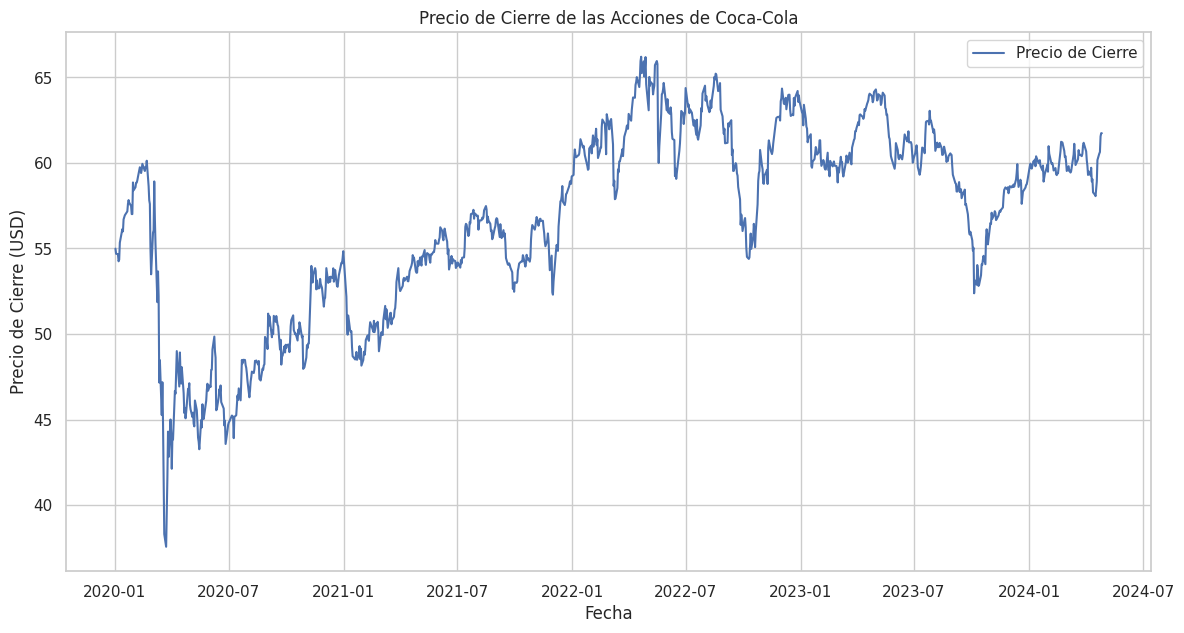

In [ ]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de los precios de cierre
plt.figure(figsize=(14, 7))
plt.plot(coca_cola_data['Close'], label='Precio de Cierre')
plt.title('Precio de Cierre de las Acciones de Coca-Cola')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()


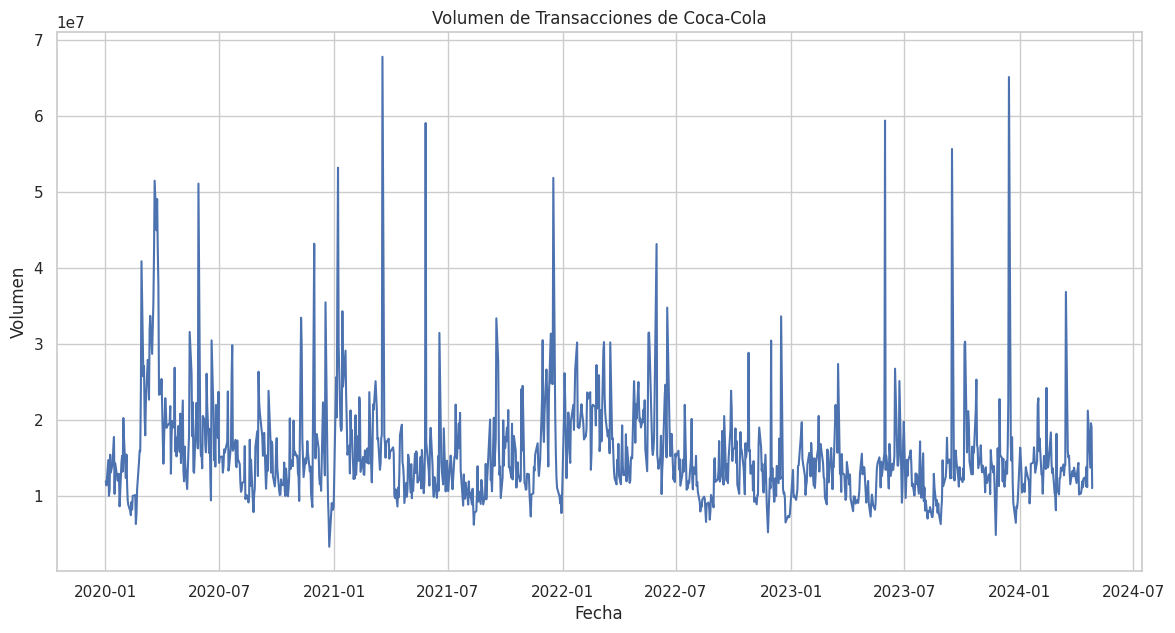

In [ ]:
# Gráfico de volumen de transacciones
plt.figure(figsize=(14, 7))
plt.plot(coca_cola_data['Volume'], label="Volumen")
plt.title('Volumen de Transacciones de Coca-Cola')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.show()

### ***2.4. Análisis de correlación:***

Antes de finalizar esta etapa, es útil realizar un análisis de correlación entre las diferentes variables numéricas del conjunto de datos para entender cómo se relacionan entre sí. Esto es especialmente importante para la selección de características en la siguiente fase del proyecto.

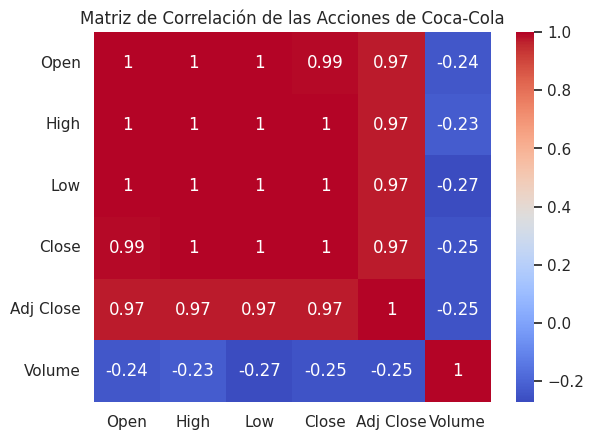

In [ ]:
# Matriz de correlación
corr_matrix = coca_cola_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de las Acciones de Coca-Cola')
plt.show()


* Podemos observa que la variable "Volume", es cercana a 0, un valor cercano a 0 indica que no hay una correlación lineal aparente entre las dos variables. Esto no necesariamente significa que no hay relación alguna, sino que la relación no es lineal o es muy débil.

* Por otro lado podemos observar que "Open", "High", "Low", "Close", tienen una correlación cercana a 1 entre ellas, esto indica una alta multicolinealidad. En la práctica, tener variables altamente correlacionadas puede llevar a problemas debido a que la regresión lineal es sensible a la multicolinealidad.

## **3. Preparación de los datos:**

### ***3.1. Limpieza de Datos***

Antes de hacer cualquier manipulación, es importante asegurar que los datos están limpios. Esto incluye:

- **Manejo de valores faltantes**: Revisa si hay valores faltantes en tu dataset y decide cómo manejarlos. Puedes optar por llenarlos con un valor como la media o la mediana de la columna, o eliminar las filas o columnas con valores faltantes, dependiendo de cuántos son y su importancia

In [ ]:
# Llenar valores faltantes con la media
coca_cola_data.fillna(coca_cola_data.mean(), inplace=True)

### ***3.2. Selección de Características***

Decide qué variables incluir en el modelo. Basándote en la matriz de correlación obtenida anteriormente, puedes seleccionar aquellas características que tengan una mayor correlación con la variable objetivo (`Close`).

- **Evitar multicolinealidad**: Si dos características están altamente correlacionadas entre sí, considera eliminar una de ellas para reducir la multicolinealidad.

Dado que las columnas están altamente correlacionadas, es recomendable usar solo una de estas para representar la información que proporcionan, especialmente ya que el objetivo es predecir el `Close`. Normalmente se escogería la columna `Close` misma si la predicción es del precio de cierre futuro, pero si el objetivo es usar información hasta el final del día para predecir futuros valores de cierre, entonces `Open`, `High`, o `Low` del día actual pueden ser innecesarias. Aquí se podría considerar:

In [ ]:
# Preparar los datos
features = ['Open', 'High', 'Low', 'Volume', 'Adj Close']  # suponemos que 'Close' es nuestra variable objetivo
X = coca_cola_data[features]
y = coca_cola_data['Close']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Aplicar Lasso
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Revisar qué características tienen coeficientes no cero
lasso_coef = lasso.coef_
print("Coeficientes de Lasso:", lasso_coef)

# Seleccionar solo las características con coeficientes no cero
selected_features = [f for f, c in zip(features, lasso_coef) if c != 0]
print("Características seleccionadas:", selected_features)


Coeficientes de Lasso: [-0.          2.59552775  2.69334704 -0.01030061  0.23399624]
Características seleccionadas: ['High', 'Low', 'Volume', 'Adj Close']


* **Consideraciones para Coeficientes Cercanos a Cero**

  1. **Magnitud Relativa**: Los coeficientes muy pequeños, especialmente en comparación con otros coeficientes en el modelo, podrían indicar que la variable correspondiente tiene un impacto muy limitado en la predicción. En tu caso, `Volume` tiene un coeficiente de -0.0103006, lo que es bastante bajo comparado con los coeficientes de `High` y `Low`.

  2. **Significado del Modelo**: Considera el significado económico o práctico de las variables. Aunque el coeficiente de `Volume` es bajo, en contextos financieros, el volumen de transacciones puede influir en la volatilidad o estabilidad del precio. Si crees que esta es una dinámica importante basada en conocimiento del dominio, podrías decidir mantener esta variable.


* **Eliminación de las columnas descartadas por la regresión de lasso:**

In [ ]:
# Lista de columnas a eliminar
columns_to_drop = ['Open']

# Dropear las columnas del DataFrame
coca_cola_data_dropped = coca_cola_data.drop(columns=columns_to_drop)

# Mostrar las primeras filas del nuevo DataFrame para verificar los cambios
print(coca_cola_data_dropped.head())

                 High        Low      Close  Adj Close    Volume
Date                                                            
2020-01-02  55.430000  54.759998  54.990002  48.147968  11867700
2020-01-03  54.990002  54.090000  54.689999  47.885296  11354500
2020-01-06  54.910000  54.520000  54.669998  47.867779  14698300
2020-01-07  54.599998  54.150002  54.250000  47.500038   9973900
2020-01-08  54.639999  54.150002  54.349998  47.587593  10676000


### ***3.4. Transformación de características***
Transforma las características para mejorar el rendimiento del modelo. Esto puede incluir la normalización o estandarización de características numéricas, especialmente si planeas usar modelos que sean sensibles a la escala de los datos

In [ ]:
# Estandarizar las columnas seleccionadas anteriormente (excepto la fecha si es índice)
scaler = StandardScaler()
features = ['High', 'Low', 'Volume', 'Adj Close']  # Suponiendo que estas son las características
coca_cola_data_dropped[features] = scaler.fit_transform(coca_cola_data[features])


In [ ]:
coca_cola_data_dropped

,High,Low,Close,Adj Close,Volume
Date,,,,,
2020-01-02,-0.304102,-0.261293,54.990002,-0.759441,-0.533842
2020-01-03,-0.384878,-0.382222,54.689999,-0.798962,-0.608571
2020-01-06,-0.399565,-0.304611,54.669998,-0.801597,-0.121664
2020-01-07,-0.456476,-0.371392,54.250000,-0.856926,-0.809607
2020-01-08,-0.449132,-0.371392,54.349998,-0.843753,-0.707371
...,...,...,...,...,...
2024-04-22,0.650528,0.633941,60.549999,1.106508,0.013204
2024-04-23,0.659707,0.707942,60.639999,1.120049,-0.268619
2024-04-24,0.837782,0.655600,61.549999,1.256963,0.584568


### ***3.5. División de los datos***
Finalmente, se divide los datos en conjuntos de entrenamiento y prueba. Esto es importante para poder evaluar el modelo en datos que no ha visto durante el entrenamiento

In [ ]:
# Suponiendo que la variable objetivo es 'Close'
X = coca_cola_data_dropped[features]
y = coca_cola_data_dropped['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Modelado:**

### ***4.1. Evaluación Preliminar del Modelo***

Para este ejercicio, utilizaremos la regresión lineal múltiple, que es un modelo estadístico que predice el valor de una variable dependiente a partir de dos o más variables independientes. Es adecuado para este caso, ya que deseas prever el precio de cierre basado en otras características financieras diarias.



In [ ]:
# Supongamos que X e y ya están definidos y preprocesados
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicialización del modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Predicción utilizando el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error (MSE): 0.08207585787959687
R-Squared: 0.9974125007426902


In [ ]:
y_pred

array([62.7629274 , 39.54896199, 59.70026644, 62.57141987, 61.16429668,
       45.0099132 , 64.02827628, 63.83225551, 56.97283967, 53.8109619 ,
       56.82210041, 47.68392524, 56.36325105, 58.61476641, 64.58686675,
       56.15391862, 45.76159607, 53.29407327, 53.6908816 , 54.84713037,
       63.72734474, 55.90918854, 55.91210504, 54.04782134, 48.75735319,
       62.99995316, 45.75765339, 60.03516197, 48.13403988, 60.53440844,
       63.52717583, 59.92809204, 51.14846725, 57.75870515, 57.80908224,
       46.69257448, 55.13894634, 62.37728011, 58.48383291, 60.34916823,
       60.05802051, 47.00970396, 64.72751159, 56.40204659, 55.28064155,
       56.53886467, 53.11697183, 52.95481709, 51.56191597, 62.52338162,
       53.02409545, 55.80769135, 52.73545609, 62.55272462, 62.20690085,
       60.2523828 , 59.4868246 , 60.78367511, 60.50757558, 55.988176  ,
       55.75506351, 57.25260128, 48.15217299, 50.46552997, 60.10022421,
       56.01090677, 55.36791537, 57.83633478, 45.89731239, 60.23

### ***4.2. Interpretación de Resultados***

- **Mean Squared Error (MSE)**: Esta métrica te dirá cuán cerca están las predicciones del modelo a los valores reales de `Close`. Cuanto menor sea el MSE, mejor será el modelo.
- **R-Squared**: Indica la proporción de la variación de la variable dependiente que es predecible a partir de las variables independientes. Un valor cercano a 1 indica que el modelo explica una gran parte de la variación.



* **Ajuste y Optimización**

  Si los resultados iniciales no son satisfactorios, se puede considerar las siguientes estrategias de optimización:

  - Revisar y ajustar las características usadas (por ejemplo, incluir nuevas variables derivadas o excluir variables menos importantes).
  - Probar  nuevamente diferentes métodos de regularización, como Lasso o Ridge, para mejorar el desempeño del modelo y manejar mejor la multicolinealidad.
  - Utilizar técnicas de validación cruzada para garantizar que el modelo sea generalizable.

Este paso del modelado es crítico para alcanzar los objetivos del negocio que se plantearon en las fases anteriores del CRISP-DM. Una vez que el modelo sea satisfactorio, el próximo paso sería proceder con la evaluación del modelo de manera más exhaustiva y finalmente su implementación.

## **5. Evaluación:**

Esta fase implica una evaluación más profunda del modelo construido. Aquí se revisará el rendimiento del modelo en detalle para asegurarte de que cumple con los requisitos del negocio y las expectativas de las partes interesadas.


### **5.1. Validación Cruzada**


La validación cruzada es crucial para evaluar cómo el modelo generalizará a un conjunto de datos independiente no utilizado durante el entrenamiento. Esto es particularmente importante para evitar problemas como el sobreajuste. Aquí se detalla cómo implementar la validación cruzada:



**Validación cruzada usando el coeficiente de determinación $R^2$**

In [ ]:
# Usando R2 como métrica para la validación cruzada
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')

print("R2 scores para cada fold:", scores)
print("Promedio R2:", scores.mean())
print("Desviación estándar de R2:", scores.std())

R2 scores para cada fold: [0.99412697 0.99437136 0.99322699 0.98860905 0.98125288]
Promedio R2: 0.9903174511449606
Desviación estándar de R2: 0.004989930891856195


**Interpretación del Output de la Validación Cruzada**

**Interpretación:**

* Los valores son todos bastante altos (todos superiores a 0.98), lo que indica que el modelo es capaz de explicar una gran parte de la variabilidad de los datos en cada uno de los subsets utilizados para el test en la validación cruzada.


* Un  $R^2$ promedio de aproximadamente 0.990 indica un modelo muy efectivo y robusto en términos de su capacidad para explicar la variabilidad observada en la variable dependiente a través de diferentes subconjuntos del conjunto de datos.

* Una baja desviación estándar en los valores de $R^2$ sugiere que el modelo no es solo efectivo, sino también estable, sin mostrar una variabilidad significativa en su desempeño a través de diferentes segmentos del conjunto de datos.


**La validación cruzada que has realizado utilizando el Error Cuadrático Medio (MSE, por sus siglas en inglés)**

In [ ]:
# Utilizar validación cruzada con 5 folds
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Convertir scores a positivo (porque scikit-learn usa negativo)
cv_scores = -cv_scores

print("MSE en cada fold:", cv_scores)
print("MSE promedio:", cv_scores.mean())
print("Desviación estándar del MSE:", cv_scores.std())

MSE en cada fold: [0.13255859 0.03219204 0.09023564 0.06527003 0.0841988 ]
MSE promedio: 0.08089101946182846
Desviación estándar del MSE: 0.032812821216198246


**MSE en cada Fold:** Los valores indican el MSE para cada uno de los cinco segmentos del dataset (folds) en los que se dividió el conjunto de datos. El MSE mide el promedio de los cuadrados de los errores, es decir, la diferencia cuadrada entre los valores observados y los predichos por el modelo. Un MSE más bajo indica un mejor rendimiento del modelo.

**Interpretación por Fold:**
  * El primer fold tiene un MSE relativamente alto (0.13255859) comparado con los otros, lo que podría indicar que los datos en este fold son más difíciles de predecir, o que el modelo no se ajusta tan bien a este segmento.

  * El segundo fold tiene el MSE más bajo (0.03219204), sugiriendo que el modelo predice estos datos con mayor precisión.

**MSE promedio: 0.08089101946182846**

- **MSE Promedio**: Esta es la media de los MSE de todos los folds. Proporciona una medida general del rendimiento del modelo a través del conjunto de datos completo dividido en los cinco folds.
- **Interpretación General**:
  - Un MSE promedio de 0.080891 indica que, en promedio, el modelo tiene un rendimiento decente en términos de la precisión de sus predicciones a través de los diferentes segmentos del conjunto de datos.

**Desviación estándar del MSE: 0.032812821216198246**

- **Desviación Estándar del MSE**: Esta medida indica cuánto varían los MSE entre los diferentes folds. Una desviación estándar baja significaría que el rendimiento del modelo es bastante consistente a través de los diferentes folds.
- **Interpretación de la Variabilidad**:
  - La desviación estándar del MSE es 0.032812821216198246, lo cual no es insignificante en comparación con el propio MSE promedio. Esto sugiere que hay una cierta variabilidad en el rendimiento del modelo entre los diferentes folds. Específicamente, indica que el modelo podría estar realizando significativamente mejor o peor en ciertos segmentos de los datos.


* **Conclusión:**

El modelo parece tener un buen rendimiento promedio en términos de MSE a través de los cinco folds, pero la variabilidad observada en el MSE entre los folds sugiere que el modelo puede no ser uniformemente efectivo para todos los segmentos del conjunto de datos.


Sería útil investigar más sobre las características de los datos en los folds con alto y bajo MSE para entender qué podría estar causando esta variabilidad. Esto podría incluir analizar las diferencias en las características o en las distribuciones de las variables en estos folds.


Considera explorar estrategias para mejorar la consistencia del modelo a través de los folds, como ajustar los hiperparámetros, probar diferentes técnicas de preprocesamiento de datos, o incluso explorar modelos más complejos si se justifica.

### **5.2. Análisis de residuos**


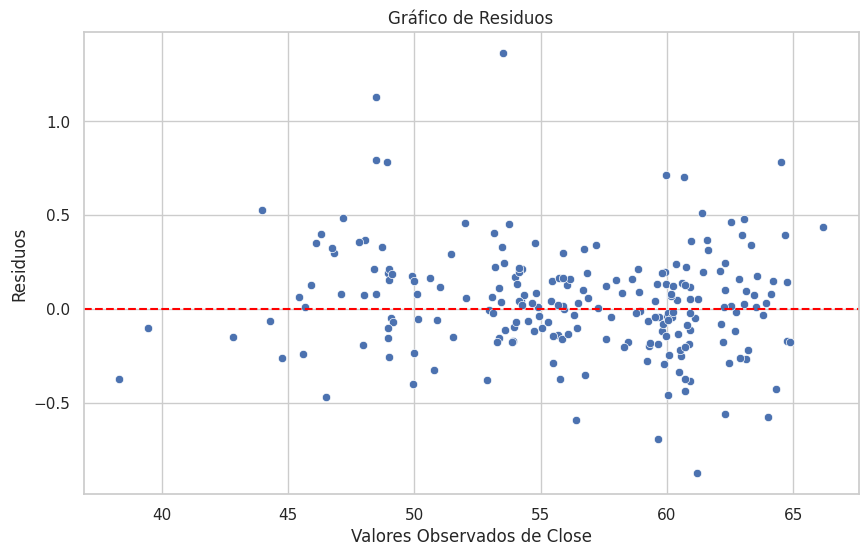

In [ ]:
# Asumiendo que y_test y y_pred están definidos de tu modelo
# Calcular residuos
residuos = y_test - y_pred

# Visualizar residuos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuos)  # Usa x= e y= para especificar los ejes
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Observados de Close')
plt.ylabel('Residuos')
plt.axhline(y=0, color='red', linestyle='--')  # Línea horizontal en residuo = 0
plt.show()


### **5.3. Evaluación con Otras Métricas**


Además del R2, es útil evaluar el modelo con otras métricas estadísticas como el Error Absoluto Medio (MAE) y el Error Cuadrático Medio (MSE) para tener una comprensión más completa del rendimiento del modelo.

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.2085312616738127


### **5.4 Comparación con un Modelo de Referencia**


A veces es útil comparar el rendimiento del modelo contra un modelo más simple, como un modelo de regresión lineal sin regularización o incluso un modelo que siempre predice el valor medio.

In [ ]:
# Modelo que predice siempre el valor medio
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(X_train, y_train)
dummy_pred = dummy_regressor.predict(X_test)

# Calcular y comparar R2
dummy_r2 = r2_score(y_test, dummy_pred)
print("R2 del modelo dummy:", dummy_r2)
print("R2 de nuestro modelo:", r2)


R2 del modelo dummy: -0.006390532878156163
R2 de nuestro modelo: 0.9974125007426902


### ***5.5 Análisis de Complejidad del Modelo***

El análisis de la complejidad del modelo implica evaluar cómo el modelo responde a cambios en el número de predictores o la profundidad del modelo (en modelos más complejos como árboles de decisión o redes neuronales). En el contexto de la regresión lineal, esto podría explorarse variando el número de características o utilizando modelos polinomiales de diferentes grados.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Explorar la complejidad del modelo variando el grado del polinomio
for degree in [1, 2, 3, 4]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores = -cv_scores
    print(f"Grado {degree}: MSE promedio = {cv_scores.mean()}, STD = {cv_scores.std()}")


Grado 1: MSE promedio = 0.08089101946182803, STD = 0.03281282121619782
Grado 2: MSE promedio = 0.1426229115204653, STD = 0.10245012692467845
Grado 3: MSE promedio = 0.7346289570118443, STD = 1.2377435265487444
Grado 4: MSE promedio = 60.61404586806266, STD = 118.46099078229531


### ***5.6 Análisis de Sesgo-Varianza***

El análisis de sesgo-varianza ayuda a comprender si el modelo está sobreajustando o subajustando los datos. Un modelo con alto sesgo no captura bien las relaciones subyacentes (subajuste), mientras que un modelo con alta varianza reacciona demasiado a las fluctuaciones en los datos de entrenamiento (sobreajuste).

- **Alto Sesgo**: Modelos muy simples, error de entrenamiento y de validación altos.
- **Alta Varianza**: Gran diferencia entre el error de entrenamiento y el error de validación.

Implementando una visualización simple del comportamiento del modelo al cambiar la complejidad:

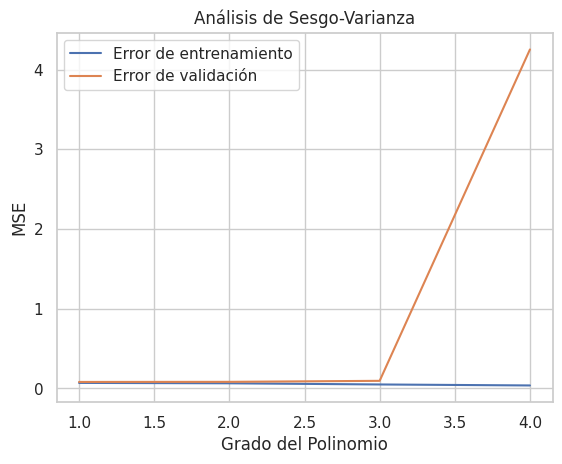

In [ ]:
import matplotlib.pyplot as plt

train_errors, val_errors = [], []

for degree in range(1, 5):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_val_predict = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))

# Visualizar errores
plt.plot(range(1, 5), train_errors, label='Error de entrenamiento')
plt.plot(range(1, 5), val_errors, label='Error de validación')
plt.xlabel('Grado del Polinomio')
plt.ylabel('MSE')
plt.legend()
plt.title('Análisis de Sesgo-Varianza')
plt.show()


Este gráfico nos ayuda a identificar el punto en el cual el incremento en la complejidad del modelo no justifica el incremento en el rendimiento del mismo, indicando el equilibrio óptimo entre sesgo y varianza.



## **6. Implementación**

La última fase involucra la aplicación práctica del modelo de minería de datos. Esto puede incluir la creación de un plan de implementación, la preparación de reportes de resultados para las partes interesadas, la realización de acciones concretas basadas en los resultados del modelo y el monitoreo de la efectividad del modelo a lo largo del tiempo.


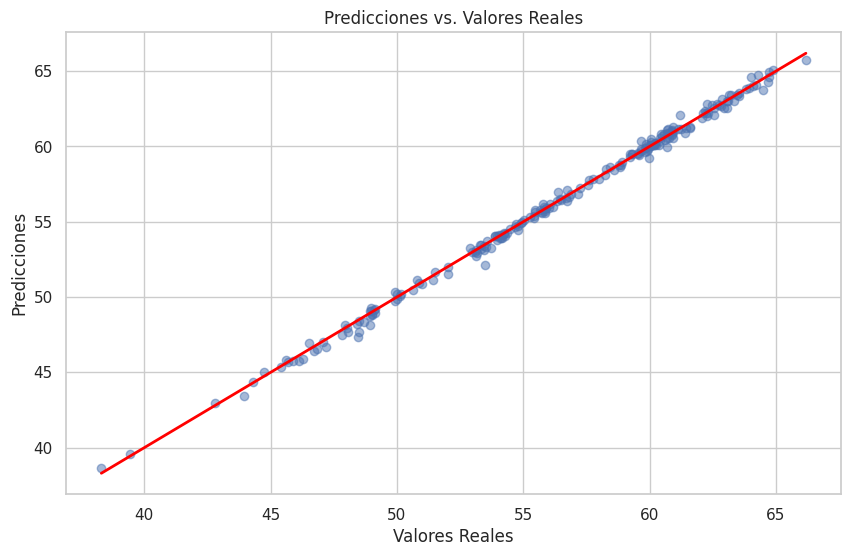

In [ ]:
# Configura el estilo visual de los gráficos de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.scatter(y_test, y_pred, alpha=0.5)  # Gráfico de dispersión con semi-transparencia

# Añadir una línea de perfecta predicción
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Línea de y=x

# Añadir títulos y etiquetas
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()


El último paso del ciclo CRISP-DM, **Implementación**, es crucial porque es donde tu modelo de predicción comienza a tener un impacto real en las decisiones de negocio o en la operación de sistemas. La implementación no solo involucra el despliegue técnico del modelo, sino también la preparación de la organización para usar y beneficiarse del modelo.


### 1. **Preparación para la Implementación**

Antes de implementar el modelo en producción, se necesita preparar tanto el entorno técnico como a los usuarios finales:

#### Integración con los Sistemas Existentes
- **APIs y Servicios**: Se desarrollará una API o un servicio web para que el modelo pueda ser accedido fácilmente por otras aplicaciones o sistemas dentro de la empresa.
- **Automatización de la Entrada de Datos**: Asegúrate de que el flujo de datos hacia el modelo es automático y confiable, utilizando datos en tiempo real cuando sea necesario.

#### Capacitación
- **Capacitación de Usuarios**: Capacita a los usuarios finales, como analistas financieros o gestores de decisiones, sobre cómo utilizar las predicciones del modelo en sus actividades diarias.

### 2. **Despliegue del Modelo**

El despliegue efectivo del modelo es un paso técnico crítico que requiere coordinación entre varios equipos:

#### Ambiente de Producción
- **Hardware y Software**: Asegurar que la infraestructura de hardware y software esté lista y sea capaz de manejar las cargas de trabajo esperadas sin degradar el rendimiento.
- **Monitorización y Mantenimiento**: Establecer sistemas para monitorear el rendimiento del modelo y programar actualizaciones regulares o recalibraciones para mantener la precisión del modelo a lo largo del tiempo.

#### Pruebas de Aceptación
- **Pruebas de Estrés**: Se realiza pruebas de estrés en el sistema para asegurar que el modelo funciona correctamente bajo diferentes condiciones de carga.
- **Validación Final**: Antes del lanzamiento completo, validar el modelo en un entorno de producción con un conjunto limitado de usuarios para asegurar que todo funciona como se espera.

### 3. **Post-Implementación**

Una vez que el modelo está en producción, la tarea no ha terminado. Se necesita un plan para la supervisión continua y la mejora del modelo:

#### Monitorización Continua
- **Rendimiento del Modelo**: Se monitoreará continuamente el rendimiento del modelo para detectar cualquier degradación o desviación de los resultados esperados.
- **Feedback del Usuario**: Se recopilará feedback de los usuarios para entender cómo el modelo está siendo utilizado y cómo se podría mejorar.

#### Mantenimiento y Actualizaciones
- **Actualizaciones Regulares**: Se planeará actualizaciones regulares del modelo basadas en nuevos datos, cambios en el mercado o feedback de los usuarios.
- **Retraining Automático**: Se considerará implementar procedimientos de reentrenamiento automático si el flujo de datos lo permite y los datos cambian con suficiente frecuencia.

### 4. **Evaluación del Impacto**

Finalmente, evalúa el impacto del modelo en la organización:

- **ROI y KPIs**: Determina el retorno de la inversión (ROI) y otros indicadores clave de rendimiento (KPIs) para medir el impacto del modelo en la toma de decisiones y en los resultados de negocio.
- **Informes de Impacto**: Se generará informes regulares sobre el impacto y el valor que el modelo está proporcionando a la empresa.

### Conclusión

Implementar un modelo de predicción exitosamente en una organización requiere una planificación cuidadosa, una integración técnica sólida, y un compromiso con el mantenimiento y la mejora continua del modelo. Al seguir estos pasos, puedes asegurarte de que tu modelo no solo sea técnica y analíticamente sólido, sino también un activo valioso y práctico para tu organización.